In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('Datasets/DailyDelhiClimate.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [42]:
df = df.head(300)
df.shape

(300, 5)

In [43]:
df = df[['date', 'meantemp']]
df

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
295,2013-10-23,25.000000
296,2013-10-24,23.857143
297,2013-10-25,22.800000
298,2013-10-26,23.000000


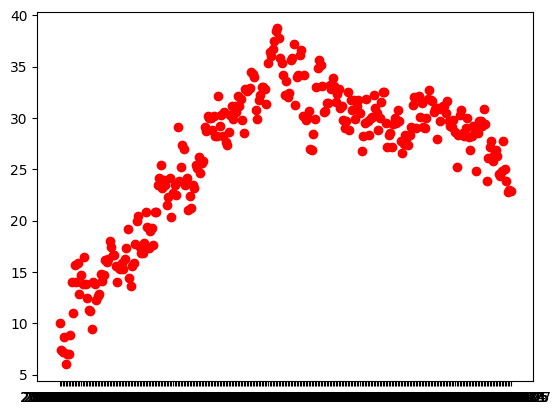

In [44]:
plt.scatter(df['date'], df['meantemp'], color='red');

In [62]:
x1 = df['meantemp'].ewm(alpha=0.1).mean()  # beta = 1 - alpha; thats means, here the value of beta is 0.9

In [63]:
x1

0      10.000000
1       8.631579
2       8.091021
3       8.258408
4       7.706918
         ...    
295    26.664002
296    26.383316
297    26.024985
298    25.722486
299    25.437738
Name: meantemp, Length: 300, dtype: float64

In [64]:
df['ewma'] = x1
df

,date,meantemp,ewma
0,2013-01-01,10.000000,10.000000
1,2013-01-02,7.400000,8.631579
2,2013-01-03,7.166667,8.091021
3,2013-01-04,8.666667,8.258408
4,2013-01-05,6.000000,7.706918
...,...,...,...
295,2013-10-23,25.000000,26.664002
296,2013-10-24,23.857143,26.383316
297,2013-10-25,22.800000,26.024985
298,2013-10-26,23.000000,25.722486


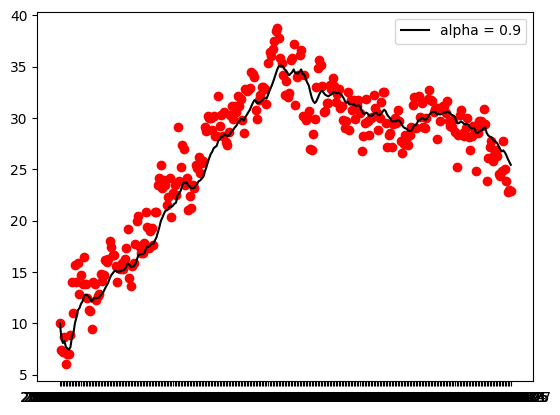

In [65]:
plt.scatter(df['date'], df['meantemp'], color='red')
plt.plot(df['date'], x1, color='black', label='alpha = 0.9')
plt.legend()
plt.show()